<a href="https://colab.research.google.com/github/Hazim14/HZ1258/blob/main/Hzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***BANK CUSTOMER CHURN MODEL***

#OBJECTIVE
###1.Preprocess data for machine learning.
###2.Handle class imbalance using under-sampling and over-sampling.
###3.Train a Support Vector Machine model.
###4.Apply hyperparameter tuning to improve model accuracy.


## Data Source
### Bank Churn.CSV from HZ1258 GitHub repository



# Import Modules

In [1027]:
import pandas as pd

In [1028]:
import numpy as np

In [1029]:
import matplotlib.pyplot as plt

In [1030]:
import seaborn as sns

# Import Data

In [1031]:
df=pd.read_csv('https://github.com/Hazim14/HZ1258/raw/main/bank-churn-data.csv')

# Analyzing Data

In [1032]:
df.head()

,CustomerId,CustomerName,CreditScore,State,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn
0,23112001,Patel,619,Mumbai,Male,42,2,75632.45,1,1,1,85000.0,0
1,23112002,Sharma,845,Delhi,Female,35,5,124563.89,2,1,1,112000.0,0
2,23112003,Singh,602,Bangalore,Male,29,1,2345.67,1,0,0,45000.0,1
3,23112004,Kumar,708,Chennai,Female,48,8,156789.23,3,1,1,95000.0,0
4,23112005,Gupta,456,Mumbai,Male,33,2,1234.56,2,1,0,52000.0,1


In [1033]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       50 non-null     int64  
 1   CustomerName     50 non-null     object 
 2   CreditScore      50 non-null     int64  
 3   State            50 non-null     object 
 4   Gender           50 non-null     object 
 5   Age              50 non-null     int64  
 6   Tenure           50 non-null     int64  
 7   Balance          50 non-null     float64
 8   NumOfProducts    50 non-null     int64  
 9   HasCreditCard    50 non-null     int64  
 10  IsActiveMember   50 non-null     int64  
 11  EstimatedSalary  50 non-null     float64
 12  Churn            50 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 5.2+ KB


# Data Visualization

In [1034]:
df['State'].value_counts()

,count
State,
Mumbai,10
Delhi,10
Bangalore,5
Chennai,5
Hyderabad,5
Kolkata,5
Ahmedabad,5
Kerala,5


In [1035]:
df.replace({'State':{'Mumbai':7,'Kolkata':2,'Chennai':4,'Kerala':0,'Ahmedabad':1,'Hyderabad':3,'Bangalore':5,'Delhi':6}}, inplace=True)

<ipython-input-1035-9d467f1a9d7d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'State':{'Mumbai':7,'Kolkata':2,'Chennai':4,'Kerala':0,'Ahmedabad':1,'Hyderabad':3,'Bangalore':5,'Delhi':6}}, inplace=True)


In [1036]:
df['Gender'].value_counts()

,count
Gender,
Male,25
Female,25


In [1037]:
df.replace({'Gender':{'Female':1,'Male':0}}, inplace=True)

<ipython-input-1037-1bd04c803acd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Female':1,'Male':0}}, inplace=True)


In [1038]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,24
2,21
3,5


In [1039]:
df.replace({'NumOfProducts':{1:0,2:1,3:2,4:3}}, inplace=True)

In [1040]:
df['HasCreditCard'].value_counts()

,count
HasCreditCard,
1,38
0,12


In [1041]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,26
0,24


In [1042]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

,count
Churn,


In [1043]:
df['ZeroBalance']=np.where(df['Balance']>0,1,0)

<Axes: >

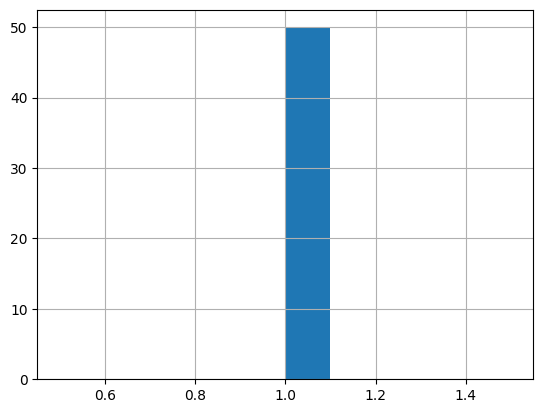

In [1044]:
df['ZeroBalance'].hist()

In [1045]:
df.groupby(['Churn','ZeroBalance']).count()

,,CustomerId,CustomerName,CreditScore,State,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary
Churn,ZeroBalance,,,,,,,,,,,,
0,1,26,26,26,26,26,26,26,26,26,26,26,26
1,1,24,24,24,24,24,24,24,24,24,24,24,24


# Define Label

In [1046]:
df.columns

Index(['CustomerId', 'CustomerName', 'CreditScore', 'State', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCreditCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn', 'ZeroBalance'],
      dtype='object')

In [1047]:
X=df.drop(['CustomerName','Churn'],axis=1)

In [1048]:
y=df['Churn']

In [1049]:
X.shape, y.shape

((50, 12), (50,))

In [1050]:
df['Churn'].value_counts()

,count
Churn,
0,26
1,24


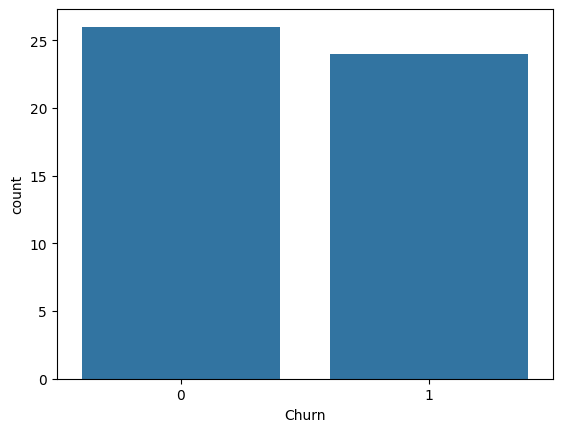

In [1051]:
sns.countplot(x='Churn', data=df);

In [1052]:
X.shape, y.shape

((50, 12), (50,))

## RUS

In [1053]:
from imblearn.under_sampling import RandomUnderSampler

In [1054]:
rus=RandomUnderSampler(random_state=2529)

In [1055]:
X_rus, y_rus=rus.fit_resample(X,y)

In [1056]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((48, 12), (48,), (50, 12), (50,))

In [1057]:
y.value_counts()

,count
Churn,
0,26
1,24


In [1058]:
y_rus.value_counts()

,count
Churn,
0,24
1,24


<Axes: ylabel='Frequency'>

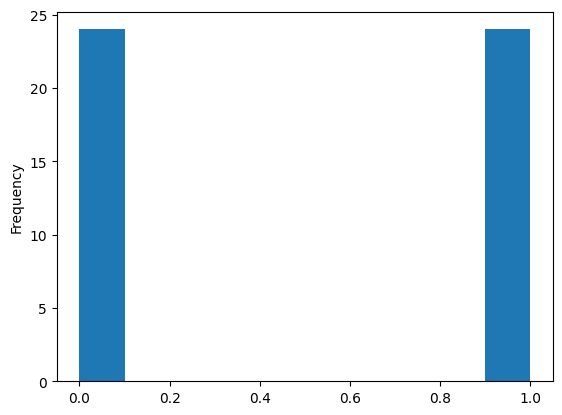

In [1059]:
y_rus.plot(kind='hist')

## ROS

In [1060]:
from imblearn.over_sampling import RandomOverSampler

In [1061]:
ros=RandomOverSampler(random_state=2529)

In [1062]:
X_ros, y_ros=ros.fit_resample(X,y)

In [1063]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((52, 12), (52,), (50, 12), (50,))

In [1064]:
y.value_counts()

,count
Churn,
0,26
1,24


In [1065]:
y_ros.value_counts()

,count
Churn,
0,26
1,26


<Axes: ylabel='Frequency'>

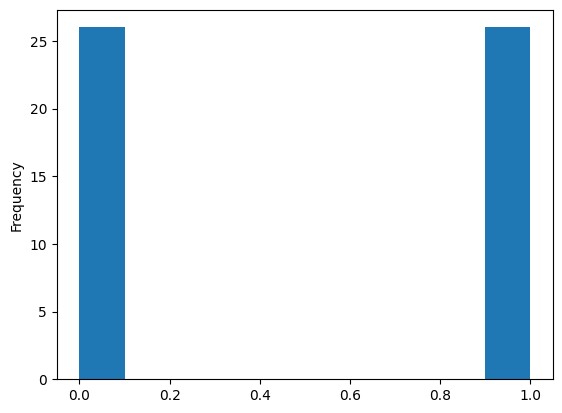

In [1066]:
y_ros.plot(kind='hist')

# Train Test Split

In [1067]:
from sklearn.model_selection import train_test_split

## Spliting Original Data

In [1068]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=2529)

##Split Random Under Sample Data

In [1069]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus=train_test_split(X_rus, y_rus, test_size=0.3, random_state=2529)

## Split Random Over Sample Data

In [1070]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros=train_test_split(X_ros, y_ros, test_size=0.3, random_state=2529)

## Standardize Features

In [1071]:
from sklearn.preprocessing import StandardScaler

In [1072]:
sc=StandardScaler()

## Standardize Original Data

In [1073]:
X_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [1074]:
X_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

## Standardize Random Under Sample Data

In [1075]:
X_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [1076]:
X_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

## Standardize Random Under Sample Data

In [1077]:
X_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [1078]:
X_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

## Support  Vector Machine Classifier


In [1079]:
from sklearn.svm import SVC

In [1080]:
svc=SVC()

In [1081]:
svc.fit(X_train, y_train)

SVC()

In [1082]:
y_pred=svc.predict(X_test)

# MODELING & MODEL EVALUATION

## Modeling with Original Data

In [1083]:
from sklearn.metrics import confusion_matrix, classification_report

In [1084]:
confusion_matrix(y_test, y_pred)

array([[7, 0],
       [8, 0]])

In [1085]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.00      0.00      0.00         8

    accuracy                           0.47        15
   macro avg       0.23      0.50      0.32        15
weighted avg       0.22      0.47      0.30        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hyperparameter Tuning

In [1086]:
from sklearn.model_selection import GridSearchCV

In [1087]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight': ['balanced']}

In [1088]:
grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [1089]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [1090]:
grid_predictions=grid.predict(X_test)

In [1091]:
confusion_matrix(y_test, grid_predictions)

array([[6, 1],
       [2, 6]])

In [1092]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



### MODEL WITH RUS

In [1093]:
svc_rus=SVC()

In [1094]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [1095]:
y_pred_rus=svc_rus.predict(X_test_rus)

Model accuracy

In [1096]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[0, 8],
       [0, 7]])

In [1097]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.47      1.00      0.64         7

    accuracy                           0.47        15
   macro avg       0.23      0.50      0.32        15
weighted avg       0.22      0.47      0.30        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hyperparameter Tuning

In [1098]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight': ['balanced']}

In [1099]:
grid_rus=GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [1100]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [1101]:
grid_predictions_rus=grid_rus.predict(X_test_rus)

In [1102]:
confusion_matrix(y_test_rus, grid_predictions_rus)

array([[8, 0],
       [0, 7]])

In [1103]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## MODEL WITH ROS

In [1104]:
svc_ros=SVC()

In [1105]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [1106]:
y_pred_ros=svc_ros.predict(X_test_ros)

Model Accuracy

In [1107]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[0, 9],
       [0, 7]])

In [1108]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.44      1.00      0.61         7

    accuracy                           0.44        16
   macro avg       0.22      0.50      0.30        16
weighted avg       0.19      0.44      0.27        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hyperparameter Tuning

In [1109]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight': ['balanced']}

In [1110]:
grid_ros=GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [1111]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [1112]:
grid_predictions_ros=grid_ros.predict(X_test_ros)

In [1113]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[8, 1],
       [0, 7]])

In [1114]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      1.00      0.93         7

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



# Prediction

In [1115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.00      0.00      0.00         8

    accuracy                           0.47        15
   macro avg       0.23      0.50      0.32        15
weighted avg       0.22      0.47      0.30        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1116]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



In [1117]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.47      1.00      0.64         7

    accuracy                           0.47        15
   macro avg       0.23      0.50      0.32        15
weighted avg       0.22      0.47      0.30        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1118]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [1119]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.44      1.00      0.61         7

    accuracy                           0.44        16
   macro avg       0.22      0.50      0.30        16
weighted avg       0.19      0.44      0.27        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1120]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      1.00      0.93         7

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16

